## Parametry

In [13]:
SERIES_LENGHT = 72
VALUES_DATATYPE = 'float16'
LEARNING_RATE = 0.0001
EPOCHS = 100
BATCH_SIZE = 32

## Wczytanie danych z pliku

In [14]:
import numpy as np

data = np.load("../resources/" + "data_%s_series_%d.npy" % (VALUES_DATATYPE, SERIES_LENGHT))
print(data)
print(data.shape)

[[[-0.2517  -0.2258   0.2161  ...  0.       0.       0.     ]
  [-0.2517  -0.2478   0.2386  ...  0.       0.       0.     ]
  [-0.2517  -0.2698   0.1708  ...  0.       0.       0.     ]
  ...
  [ 5.336   -0.4893  -0.1232  ...  0.       0.       0.     ]
  [ 0.1473  -0.555   -0.2815  ...  0.       0.       0.     ]
  [-0.2517  -0.4233  -0.3042  ...  0.       0.       0.     ]]

 [[-0.2517  -0.2917   0.1029  ...  0.       0.       0.     ]
  [-0.2517  -0.3357   0.01246 ...  0.       0.       0.     ]
  [-0.2517  -0.3574  -0.01016 ...  0.       0.       0.     ]
  ...
  [-0.2517  -0.709   -1.028   ...  0.       0.       0.     ]
  [-0.05212 -0.8623  -1.164   ...  0.       0.       0.     ]
  [ 0.9453  -1.126   -1.096   ...  0.       0.       0.     ]]

 [[-0.2517  -0.4453  -0.7793  ...  0.       0.       0.     ]
  [-0.2517  -0.577   -0.734   ...  0.       0.       0.     ]
  [-0.2517  -0.643   -1.073   ...  0.       0.       0.     ]
  ...
  [-0.2517  -0.8843  -1.187   ...  0.       0.  

## Wydzielenie zbiorów

In [15]:
from sklearn.model_selection import train_test_split

X = np.swapaxes(data[:, :SERIES_LENGHT - 1, :],1,2)
Y = np.swapaxes(data[:, SERIES_LENGHT - 1:, :],1,2)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print("Dane treningowe: "+ str(X_train.shape))

Dane treningowe: (184649, 37, 71)


## Definicja sieci

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import *
from script.main.loss_functions import *
import tensorflow as tf

model = Sequential()
model.add(LSTM(units=512, activation=tf.keras.layers.LeakyReLU(alpha=0.3), return_sequences=True, input_shape=(37, SERIES_LENGHT - 1)))
model.add(LSTM(units=512, activation=tf.keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dense(19))
model.compile(loss=mean_proportional_loss_func, optimizer=Adam(lr=LEARNING_RATE), metrics=['accuracy'])

## Diagram sieci

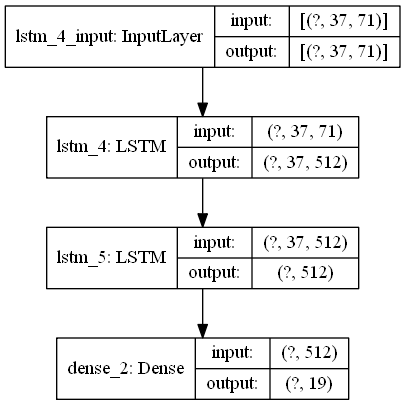

In [17]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Uczenie

In [18]:
model.fit(X_train,Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2)


Train on 184649 samples
Epoch 1/100
184649/184649 - 236s - loss: 0.4815 - accuracy: 0.1981
Epoch 2/100
184649/184649 - 234s - loss: 0.3985 - accuracy: 0.1999
Epoch 3/100
184649/184649 - 235s - loss: 0.3186 - accuracy: 0.2350
Epoch 4/100
184649/184649 - 235s - loss: 0.2769 - accuracy: 0.2827
Epoch 5/100
184649/184649 - 233s - loss: 0.2610 - accuracy: 0.3125
Epoch 6/100
184649/184649 - 234s - loss: 0.2586 - accuracy: 0.3094
Epoch 7/100
184649/184649 - 232s - loss: 0.2475 - accuracy: 0.3217
Epoch 8/100
184649/184649 - 233s - loss: 0.2351 - accuracy: 0.3750
Epoch 9/100
184649/184649 - 232s - loss: 0.2200 - accuracy: 0.4256
Epoch 10/100
184649/184649 - 236s - loss: 0.2125 - accuracy: 0.4409
Epoch 11/100
184649/184649 - 236s - loss: 0.2048 - accuracy: 0.4684
Epoch 12/100
184649/184649 - 235s - loss: 0.1951 - accuracy: 0.4859
Epoch 13/100
184649/184649 - 236s - loss: 0.1900 - accuracy: 0.4964
Epoch 14/100
184649/184649 - 235s - loss: 0.1816 - accuracy: 0.5197
Epoch 15/100
184649/184649 - 235s

## Zapis modelu od pliku

In [19]:
model.save("../resources/trained_model.h5", save_format='tf')

## Zapis danych testowych do pliku

In [20]:
np.save("../resources/test_data/X_test", X_test)
np.save("../resources/test_data/Y_test", Y_test)

## 